In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns
import random
import cv2 as cv
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout, Activation
from keras import optimizers
from keras_preprocessing.image import ImageDataGenerator
from keras.models import load_model

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/datasets/chars/english.csv')
df.sample(10)

,image,label
2174,Img/img040-030.png,d
3012,Img/img055-043.png,s
553,Img/img011-004.png,A
3409,Img/img062-055.png,z
2171,Img/img040-027.png,d
3036,Img/img056-012.png,t
1692,Img/img031-043.png,U
845,Img/img016-021.png,F
1735,Img/img032-031.png,V
670,Img/img013-011.png,C


In [14]:
remove = ['q','w','e','r','t','y','u','i','o','p','a','s','d','f','g','h','j','k','l','z','x','c','v','b','n','m']
df = df[df['label'].map(lambda x: x not in remove)]
df.sample(10)

,image,label
369,Img/img007-040.png,6
122,Img/img003-013.png,2
1665,Img/img031-016.png,U
1010,Img/img019-021.png,I
1135,Img/img021-036.png,K
1183,Img/img022-029.png,L
1128,Img/img021-029.png,K
1330,Img/img025-011.png,O
204,Img/img004-040.png,3
752,Img/img014-038.png,D


In [15]:
classes = df['label'].unique()
quantity = len(df['label'].unique())
print(f'\n The %d Classes are: \n {classes}' %quantity)    


 The 36 Classes are: 
 ['0' '1' '2' '3' '4' '5' '6' '7' '8' '9' 'A' 'B' 'C' 'D' 'E' 'F' 'G' 'H'
 'I' 'J' 'K' 'L' 'M' 'N' 'O' 'P' 'Q' 'R' 'S' 'T' 'U' 'V' 'W' 'X' 'Y' 'Z']


In [17]:
#Create a variable that contains the general file path
DATAPATH = '/content/drive/MyDrive/Colab Notebooks/datasets/chars'
#Read another time the csv file
dataset = pd.read_csv(DATAPATH + '/english.csv')
#Pick randomly 600 values
rand = random.sample(range(len(dataset)), 300)
#Create validation set of data
validation_set = pd.DataFrame(dataset.iloc[rand,:].values, columns = ['image','label'])
#Drop Validation data from dataset
dataset.drop(rand, inplace = True)
#Pick randomly 15 values
rand = random.sample(range(len(validation_set)), 15)
#Create test set of data
test_set = pd.DataFrame(validation_set.iloc[rand,:].values, columns = ['image','label'])
#Drop Test data from validation set
validation_set.drop(rand, inplace = True)
#Show Validation dataset
validation_set

,image,label
0,Img/img010-043.png,9
1,Img/img031-025.png,U
2,Img/img034-027.png,X
3,Img/img017-021.png,G
4,Img/img045-049.png,i
...,...,...
295,Img/img043-041.png,g
296,Img/img013-038.png,C
297,Img/img031-037.png,U
298,Img/img004-054.png,3


In [18]:
train_data_generator = ImageDataGenerator(
            rescale=1/255,
            shear_range=0.2,
            zoom_range=0.2,
            width_shift_range=0.2,
            height_shift_range=0.2,)
data_generator = ImageDataGenerator(rescale = 1/255)
training_data_frame = train_data_generator.flow_from_dataframe( 
                                            dataframe = dataset, 
                                            directory = DATAPATH,
                                            x_col = 'image',
                                            y_col = 'label',
                                            target_size = (64,64),
                                            classe_mode = 'categorical')
validation_data_frame = data_generator.flow_from_dataframe( 
                                            dataframe = validation_set, 
                                            directory = DATAPATH + '',
                                            x_col = 'image',
                                            y_col = 'label',
                                            target_size = (64,64),
                                            classe_mode = 'categorical')
test_data_frame = data_generator.flow_from_dataframe( 
                                            dataframe = test_set, 
                                            directory = DATAPATH,
                                            x_col = 'image',
                                            y_col = 'label',
                                            target_size = (64,64),
                                            classe_mode = 'categorical')

Found 1795 validated image filenames belonging to 36 classes.
Found 175 validated image filenames belonging to 36 classes.
Found 10 validated image filenames belonging to 9 classes.


/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/dataframe_iterator.py:282: UserWarning: Found 1315 invalid image filename(s) in x_col="image". These filename(s) will be ignored.
  .format(n_invalid, x_col)
/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/dataframe_iterator.py:282: UserWarning: Found 110 invalid image filename(s) in x_col="image". These filename(s) will be ignored.
  .format(n_invalid, x_col)
/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/dataframe_iterator.py:282: UserWarning: Found 5 invalid image filename(s) in x_col="image". These filename(s) will be ignored.
  .format(n_invalid, x_col)


In [21]:
model = keras.Sequential([
        layers.BatchNormalization(),
        # Add first Convolutional Layer
        layers.Conv2D(filters=32, kernel_size=3, activation='relu',
                      padding='same', input_shape=(64,64,3)),
        # Add a second Convolutional Layer
        layers.Conv2D(filters=32, kernel_size=3, activation='relu'),
        # Add a Max pooling layer
        layers.MaxPool2D(pool_size=(2, 2)),
        # Add a Dropout layer
        layers.Dropout(0.25),
    
        layers.BatchNormalization(),
        # Add third Convolutional Layer
        layers.Conv2D(filters=32, kernel_size=3, activation='relu', padding = 'same'),
        # Add Fourth Convolutional Layer
        layers.Conv2D(filters=32, kernel_size=3, activation='relu'),
        # Add a Max pooling layer
        layers.MaxPool2D(pool_size=(2, 2)),
        # Add a Dropout Layer
        layers.Dropout(0.25),

        layers.BatchNormalization(),
        # Add Fifth Convolutional Layer
        layers.Conv2D(filters=32, kernel_size=3, activation='relu', padding = 'same'),
        # Add a sixth Convolutional Layer
        layers.Conv2D(filters=32, kernel_size=3, activation='relu'),
        # Add a Max Pooling Layer
        layers.MaxPool2D(pool_size=(2, 2)),
        # Add a Dropout Layer
        layers.Dropout(0.25),

        layers.BatchNormalization(),
        # Add a Flatten Layer
        layers.Flatten(),
        # Add a Dense layer Layer
        layers.Dense(512, activation = 'relu'),
        # Add a Dropout Layer
        layers.Dropout(0.5),
        # Add the Output Dense Layer
        layers.Dense(36, activation='softmax')
])
model.compile(
    optimizer=tf.keras.optimizers.Adam(epsilon=0.01),
    loss= 'categorical_crossentropy',
    metrics = ['accuracy'])

In [23]:
history = model.fit(training_data_frame, validation_data = validation_data_frame, epochs = 50)

Epoch 1/40
57/57 [==============================] - 24s 428ms/step - loss: 2.5102 - accuracy: 0.2696 - val_loss: 2.0834 - val_accuracy: 0.4171
Epoch 2/40
57/57 [==============================] - 24s 421ms/step - loss: 2.3221 - accuracy: 0.3120 - val_loss: 1.8064 - val_accuracy: 0.4857
Epoch 3/40
57/57 [==============================] - 24s 421ms/step - loss: 2.1009 - accuracy: 0.3799 - val_loss: 1.5726 - val_accuracy: 0.5371
Epoch 4/40
57/57 [==============================] - 24s 420ms/step - loss: 1.9386 - accuracy: 0.4145 - val_loss: 1.1294 - val_accuracy: 0.7029
Epoch 5/40
57/57 [==============================] - 24s 421ms/step - loss: 1.8049 - accuracy: 0.4490 - val_loss: 1.4367 - val_accuracy: 0.5143
Epoch 6/40
57/57 [==============================] - 24s 421ms/step - loss: 1.6159 - accuracy: 0.5058 - val_loss: 1.1128 - val_accuracy: 0.6571
Epoch 7/40
57/57 [==============================] - 24s 418ms/step - loss: 1.5744 - accuracy: 0.5142 - val_loss: 0.9566 - val_accuracy: 0.6800

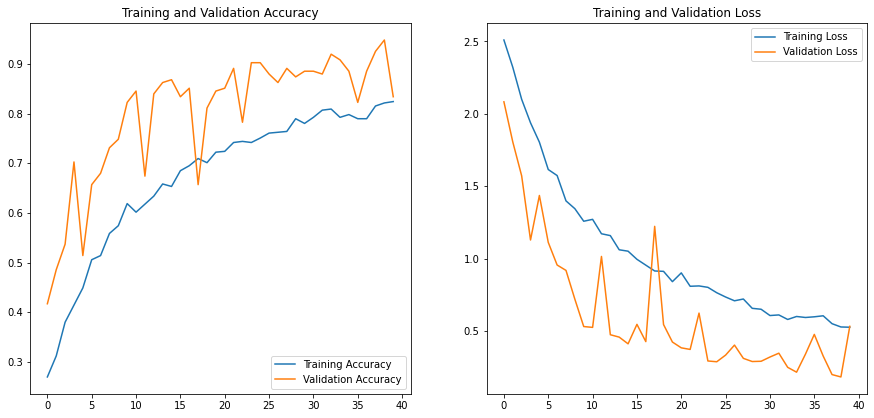

In [26]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(40)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, accuracy, label='Training Accuracy')
plt.plot(epochs_range, val_accuracy, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [37]:
tf.keras.models.save_model(
    model,
    '/content/drive/MyDrive/Colab Notebooks/models/final_model/model',
    overwrite=True,
    include_optimizer=True,
    save_format=None,
    signatures=None,
    options=None
)

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Colab Notebooks/models/final_model/model/assets


In [38]:
new_model = load_model('/content/drive/MyDrive/Colab Notebooks/models/final_model/model')

In [39]:
new_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_4 (Batch (None, None, None, 3)     12        
_________________________________________________________________
conv2d_6 (Conv2D)            (None, None, None, 32)    896       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, None, None, 32)    9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, None, None, 32)    0         
_________________________________________________________________
dropout_4 (Dropout)          (None, None, None, 32)    0         
_________________________________________________________________
batch_normalization_5 (Batch (None, None, None, 32)    128       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, None, None, 32)   